<a href="https://colab.research.google.com/github/sreej1305/ReasonaAI/blob/master/AI_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

data = pd.DataFrame({
    "time": range(100),
    "metric": np.random.normal(50, 5, 100)
})

# Inject abnormal behavior
data.loc[60:, "metric"] += np.linspace(0, 20, 40)


In [7]:
class ReasonAIAgent:
    def __init__(self, threshold=2):
        self.threshold = threshold

    def observe(self, df):
        return df["metric"]

    def reason(self, series):
        mean = series.mean()
        std = series.std()
        z_scores = (series - mean) / std
        return z_scores

    def decide(self, z_scores):
        anomalies = np.abs(z_scores) > self.threshold
        return anomalies

    def act(self, anomalies):
        if anomalies.sum() > 5:
            return "System behavior anomaly detected"
        return "System operating normally"

    def visualize(self, df, anomalies):
        plt.figure(figsize=(10,5))
        plt.plot(df["time"], df["metric"], label="Metric")
        plt.scatter(
            df["time"][anomalies],
            df["metric"][anomalies],
            color="red",
            label="Detected Anomaly"
        )
        plt.title("ReasonAI — Automated Anomaly Reasoning")
        plt.xlabel("Time")
        plt.ylabel("Metric Value")
        plt.legend()
        plt.grid(True)
        plt.show()


Agent Insight: System operating normally


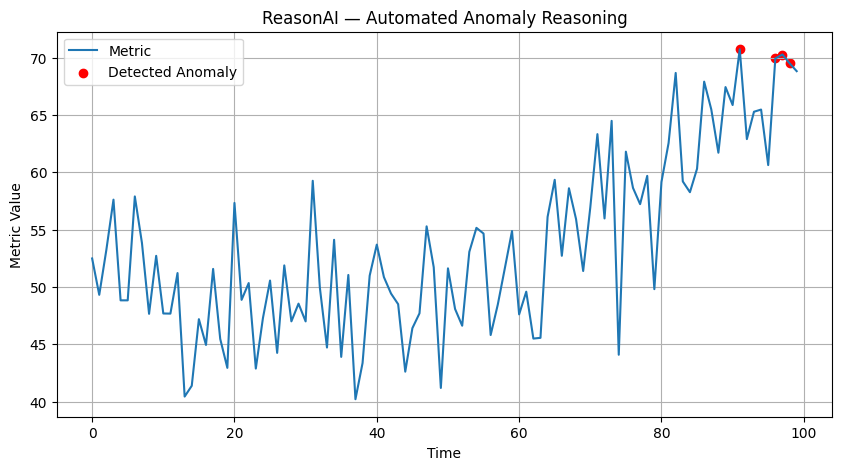

In [8]:
agent = ReasonAIAgent()

observations = agent.observe(data)
z_scores = agent.reason(observations)
decisions = agent.decide(z_scores)
insight = agent.act(decisions)

print("Agent Insight:", insight)

agent.visualize(data, decisions)


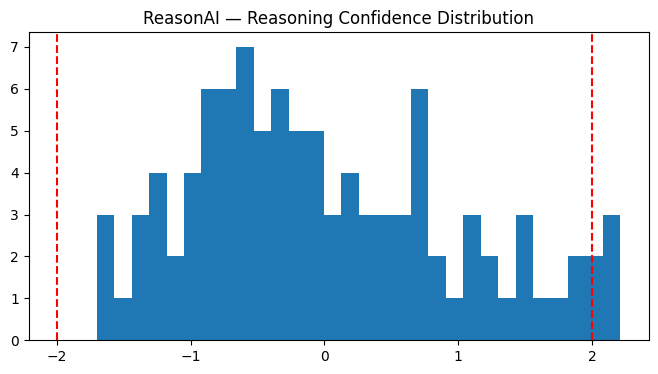

In [9]:
plt.figure(figsize=(8,4))
plt.hist(z_scores, bins=30)
plt.axvline(agent.threshold, color="red", linestyle="--")
plt.axvline(-agent.threshold, color="red", linestyle="--")
plt.title("ReasonAI — Reasoning Confidence Distribution")
plt.show()


Time step: 95
Agent Insight: System operating normally


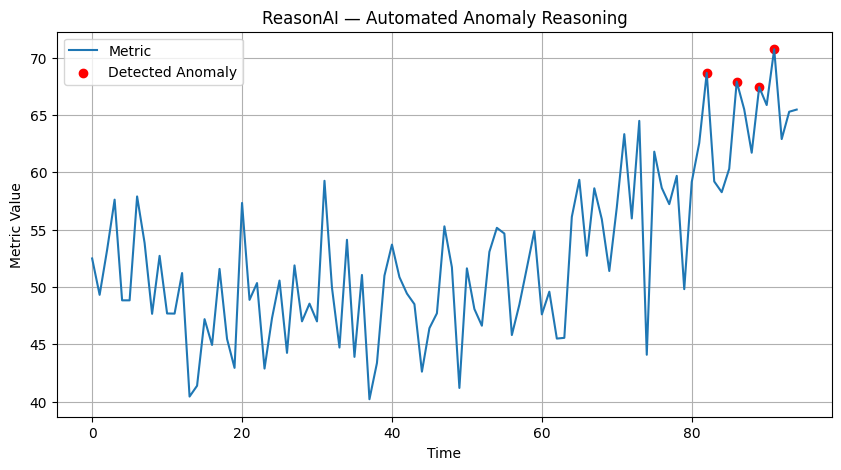

In [10]:
import time
from IPython.display import clear_output

agent = ReasonAIAgent()

for t in range(20, len(data), 5):
    live_data = data.iloc[:t]

    observations = agent.observe(live_data)
    z_scores = agent.reason(observations)
    decisions = agent.decide(z_scores)
    insight = agent.act(decisions)

    clear_output(wait=True)
    print(f"Time step: {t}")
    print("Agent Insight:", insight)

    agent.visualize(live_data, decisions)
    time.sleep(1)


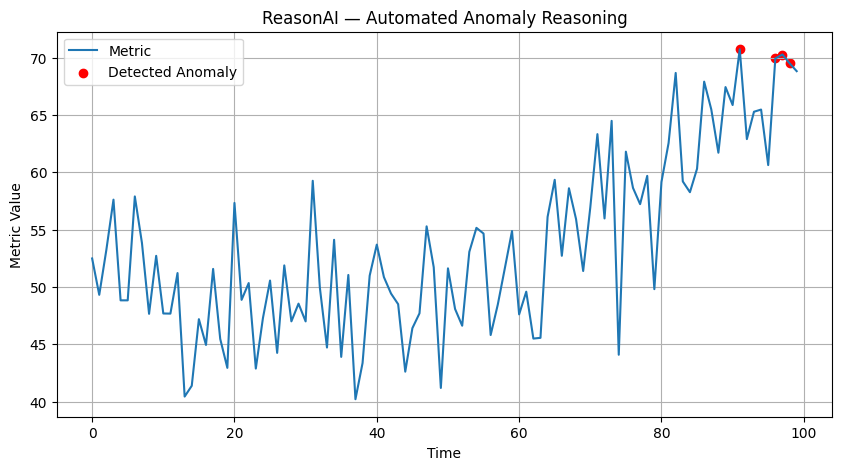

In [11]:
stream_data = []

for i in range(len(data)):
    stream_data.append(data.iloc[i])
    df_stream = pd.DataFrame(stream_data)

    obs = agent.observe(df_stream)
    z = agent.reason(obs)
    dec = agent.decide(z)

    clear_output(wait=True)
    agent.visualize(df_stream, dec)
    time.sleep(0.5)


In [12]:
import logging

logging.basicConfig(level=logging.INFO)

for step in range(3):
    logging.info("Agent observing data")
    z = agent.reason(data["metric"])
    logging.info("Agent reasoning completed")
    logging.info("Agent decision: %s", agent.act(agent.decide(z)))
